<a href="https://colab.research.google.com/github/abkerper/DS4002_Project1/blob/main/SCRIPTS/SourceCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/abkerper/DS4002_Project1

fatal: destination path 'DS4002_Project1' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/DS4002_Project1/TextbooksFinal.csv')

In [ ]:
df['ISBN'] = df['ISBN'].str.replace("-", "")

Sentiment Analysis

In [ ]:
!pip install nltk

In [ ]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [ ]:
df['Compound Sentiment'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
df['Word Count'] = df['Text'].apply(lambda x: len(x.split()))

In [ ]:
df.to_csv('CleanedData.csv')

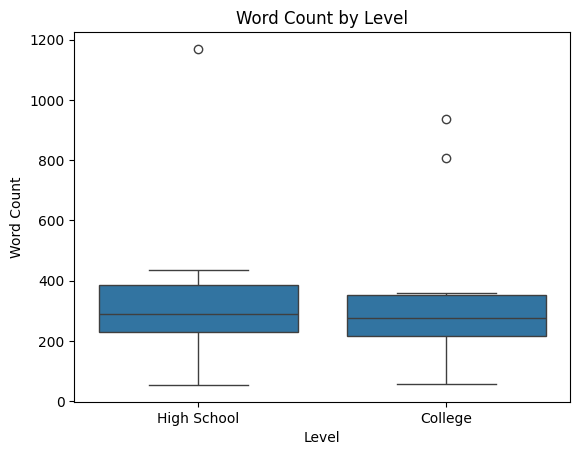

In [ ]:
sns.boxplot(data=df, x='Level', y='Word Count')

# Add title and labels
plt.title('Word Count by Level')
plt.xlabel('Level')
plt.ylabel('Word Count')

# Show the plot
plt.show()

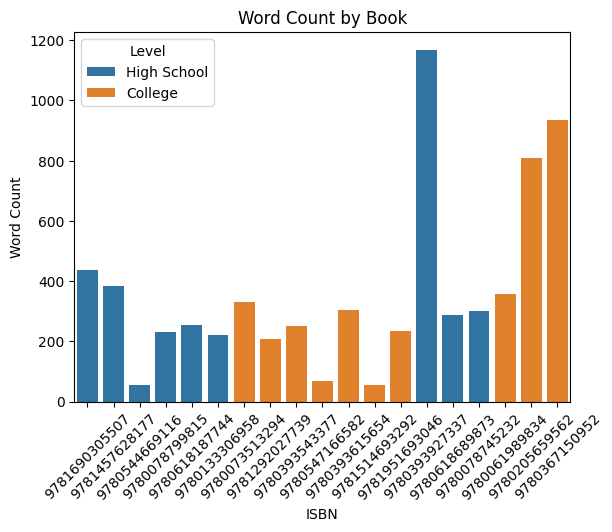

In [ ]:
sns.barplot(data=df ,x='ISBN', y='Word Count', hue = "Level")
plt.title('Word Count by Book')
plt.xticks(rotation=45)
plt.show()

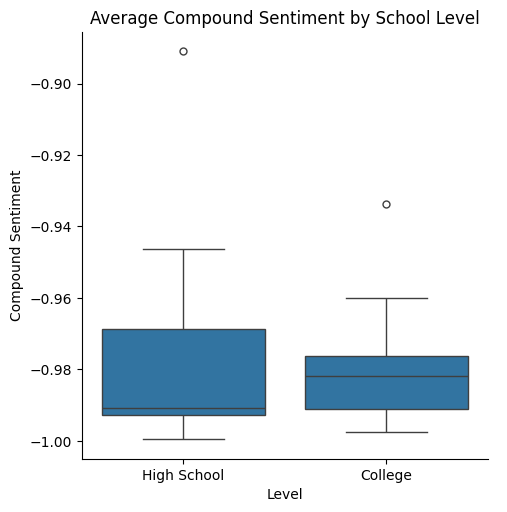

In [ ]:
sns.catplot(data=df, kind="box", x="Level", y="Compound Sentiment")
plt.title('Average Compound Sentiment by School Level')
plt.show()

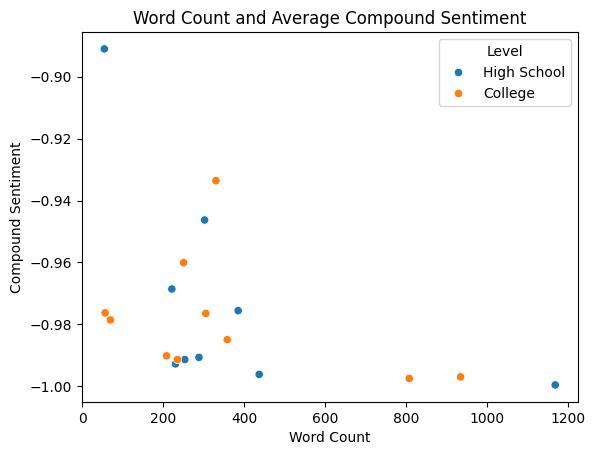

In [ ]:
sns.scatterplot(data=df, x='Word Count', y='Compound Sentiment', hue = 'Level')
plt.title('Word Count and Average Compound Sentiment')
plt.show()

In [ ]:
df[['Word Count', 'Compound Sentiment']].corr()

,Word Count,Compound Sentiment
Word Count,1.000000,-0.443559
Compound Sentiment,-0.443559,1.000000


In [ ]:
average_sentiment = df.groupby('Level')['Compound Sentiment'].mean().reset_index()

In [ ]:
display(average_sentiment)

,Level,Compound Sentiment
0,College,-0.978620
1,High School,-0.972467


In [ ]:
average_sentiment['Compound Sentiment'][1]-average_sentiment['Compound Sentiment'][0]

0.006153333333333233